In [597]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

Input DataSet

In [598]:
df = pd.read_csv("train.csv")

In [599]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [600]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [601]:
df.shape

(1460, 81)

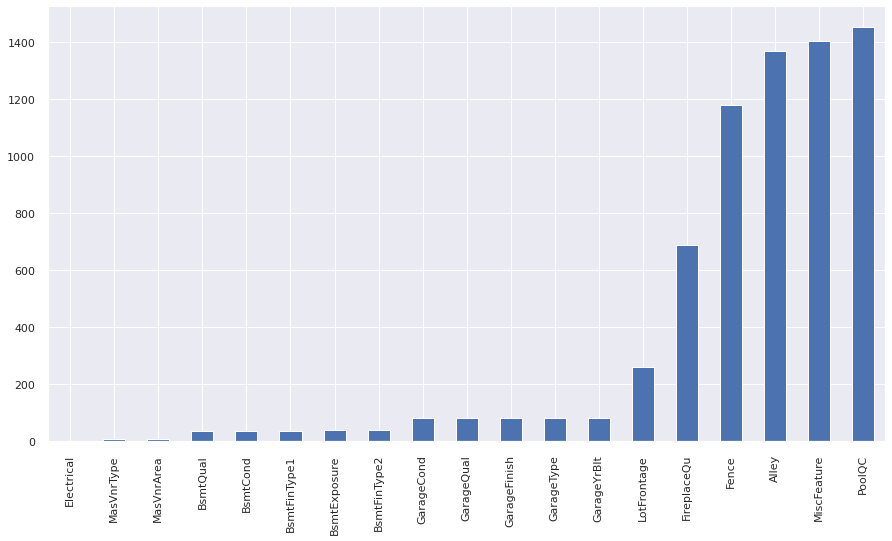

In [602]:
missing=df.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
plt.figure(figsize=(15,8))
missing.plot.bar()

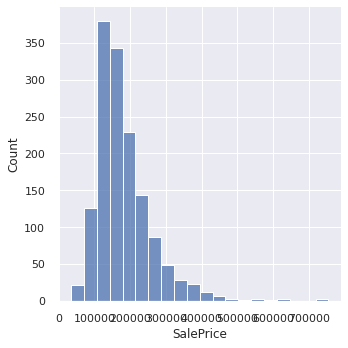

In [603]:
#bins =its divide whole range in max to min by 20 ,and each histogram comprose 20
#kde= only show distribution boundary
#positively skewed
sns.set(rc={'figure.figsize':(12,8)})
sns.displot(df['SalePrice'],kde=False ,bins=20)

In [604]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

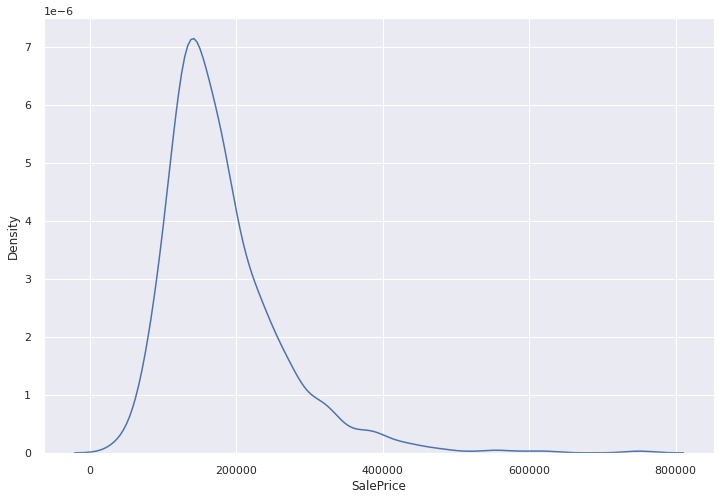

In [605]:
sns.kdeplot(df['SalePrice'])

In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Statically Describing**

In [607]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


**Visualizing the correlations between numerical and categorical variables By using Seaborn **

In [608]:
numeric_features=df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [609]:
categorical_features=df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

**Correlation**

In [610]:
correlation=numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending=False),'\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

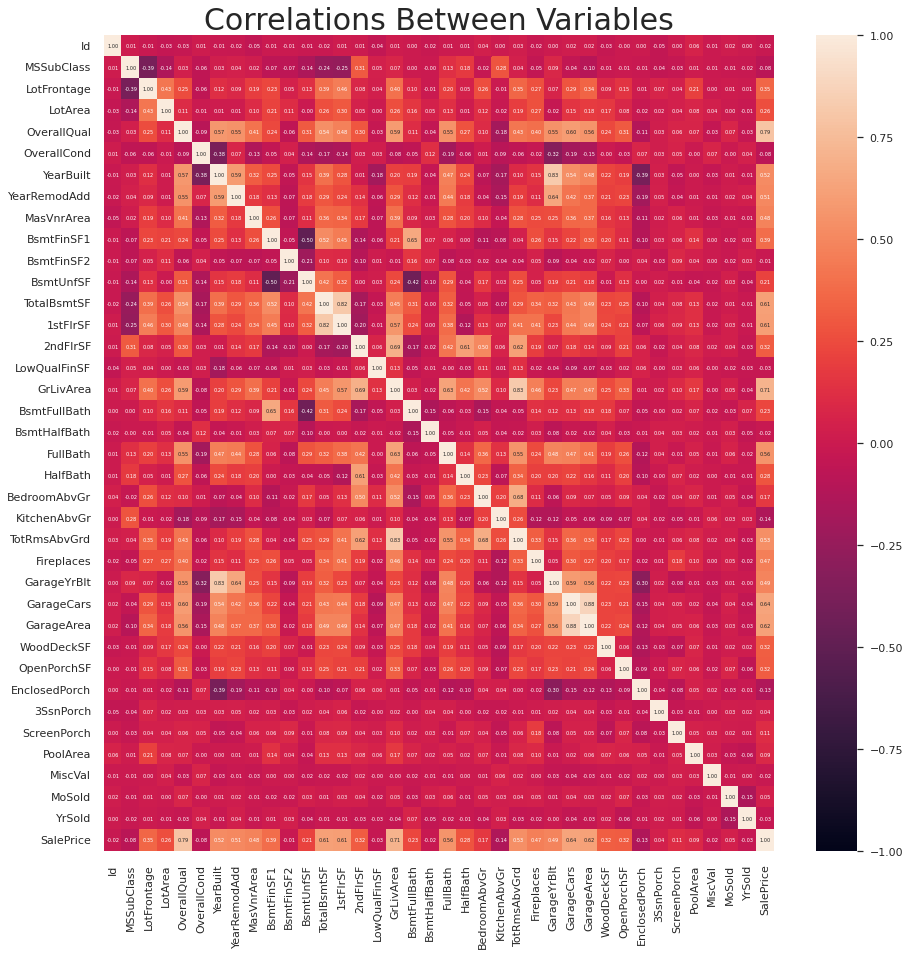

In [611]:
#Annot=true -->Note that DataFrames will match on position, not index.
plt.figure(figsize=(15,15))
plt.title("Correlations Between Variables", size=30)
sns.heatmap(df.corr(), annot=True, annot_kws={"fontsize":5}, fmt=".2f", vmin=-1)
plt.show()

**Feature Selection:**

In [612]:
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | (df.corr()["SalePrice"]<-0.50)].index)
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols
df = df[important_cols]

Visualizing the correlations between numerical variables  After Feature Selection:

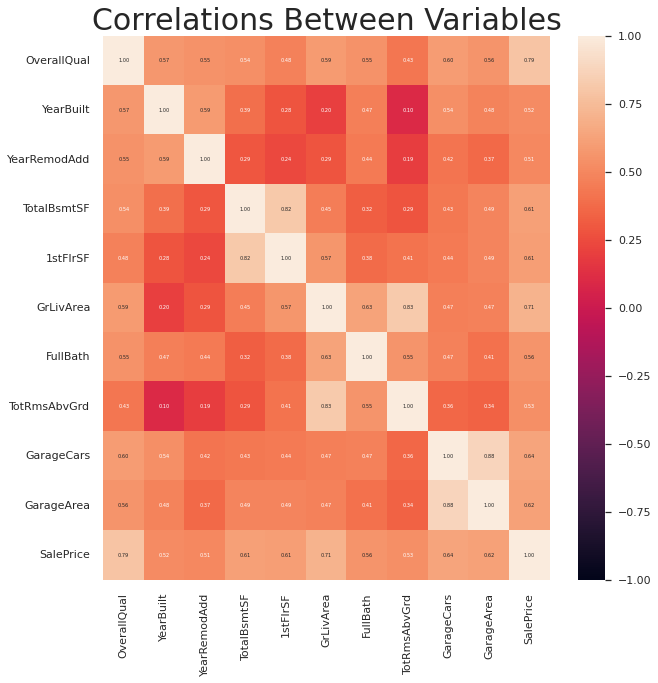

In [613]:
plt.figure(figsize=(10,10))
plt.title("Correlations Between Variables", size=30)
sns.heatmap(df.corr(), annot=True, annot_kws={"fontsize":5}, fmt=".2f", vmin=-1)
plt.show()

**Checking for the missing values:**

In [614]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageCars       0
GarageArea       0
SalePrice        0
MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


Boxplot

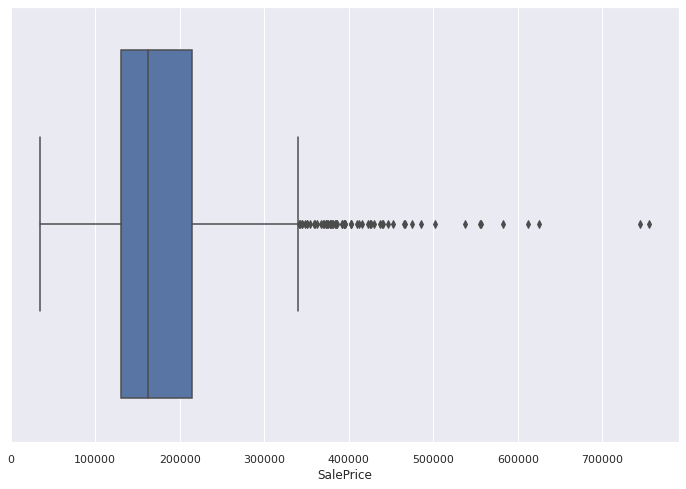

In [615]:
sns.boxplot(x=df["SalePrice"])

In [616]:
first_quartile=df['SalePrice'].quantile(.25)
third_quartile=df['SalePrice'].quantile(.75)
IQR=first_quartile+third_quartile

In [617]:
new_boundary=third_quartile+ 3*IQR

In [618]:
df.drop(df[df['SalePrice']>new_boundary].index,axis=0,inplace=True)

In [619]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [620]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OverallQual    1460 non-null   int64 
 1   YearBuilt      1460 non-null   int64 
 2   YearRemodAdd   1460 non-null   int64 
 3   TotalBsmtSF    1460 non-null   int64 
 4   1stFlrSF       1460 non-null   int64 
 5   GrLivArea      1460 non-null   int64 
 6   FullBath       1460 non-null   int64 
 7   TotRmsAbvGrd   1460 non-null   int64 
 8   GarageCars     1460 non-null   int64 
 9   GarageArea     1460 non-null   int64 
 10  MSZoning       1460 non-null   object
 11  Utilities      1460 non-null   object
 12  BldgType       1460 non-null   object
 13  Heating        1460 non-null   object
 14  KitchenQual    1460 non-null   object
 15  SaleCondition  1460 non-null   object
 16  LandSlope      1460 non-null   object
dtypes: int64(10), object(7)
memory usage: 205.3+ KB


In [621]:
X = pd.get_dummies(X, columns=cat_cols)

In [622]:
important_num_cols.remove("SalePrice")
scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [623]:
X.head(100)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,0.351000,...,0,0,0,0,0,1,0,1,0,0
1,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,-0.060731,...,1,0,0,0,0,1,0,1,0,0
2,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,0.631726,...,0,0,0,0,0,1,0,1,0,0
3,0.651479,-1.863632,-0.720298,-0.687324,-0.521734,0.383659,-1.026041,0.296763,1.650307,0.790804,...,0,1,0,0,0,0,0,1,0,0
4,1.374795,0.951632,0.733308,0.199680,-0.045611,1.299326,0.789741,1.527656,1.650307,1.698485,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.071836,0.719786,0.394133,-0.860620,-1.248855,-0.086548,0.789741,-0.318683,0.311725,-0.247882,...,1,0,0,0,0,1,0,1,0,0
96,0.651479,0.918511,0.684854,1.209815,1.100705,0.138085,0.789741,-0.318683,0.311725,-0.004586,...,0,0,0,0,0,1,0,1,0,0
97,-1.518467,-0.207594,-0.962566,-0.222160,-0.524321,-1.057421,-1.026041,-0.318683,-1.026858,-0.191736,...,1,0,0,0,0,1,0,1,0,0
98,-0.795151,-1.698028,-1.689368,-1.366828,-0.847774,-1.295380,-1.026041,-0.934130,-1.026858,-0.500535,...,1,1,0,0,0,0,0,1,0,0


**Splitting the data into Train and Test chunks for better evaluation**

In [624]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

In [625]:
print("Shape of train data  ",X_train.shape, y_train.shape) 
print("Shape of test data ", X_test.shape, y_test.shape) 

Shape of train data   (1022, 41) (1022,)
Shape of test data  (438, 41) (438,)


**Linear Regression:**

In [626]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
y_pred = lreg.predict(X_test)

In [627]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
def evaluation(y,predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [628]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [629]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
accuracy_train = lreg.score(X_train,y_train)
accuracy_test = lreg.score(X_test, y_test)
print('Accuracy train: ',accuracy_train)
print('Accuracy test: ',accuracy_test)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 20744.485263945484
MSE: 1077924437.7930937
RMSE: 32831.75959026707
R2 Score: 0.8389321734234549
Accuracy train:  0.794113103765203
Accuracy test:  0.8389321734234549
------------------------------
RMSE Cross-Validation: 35933.128976293614


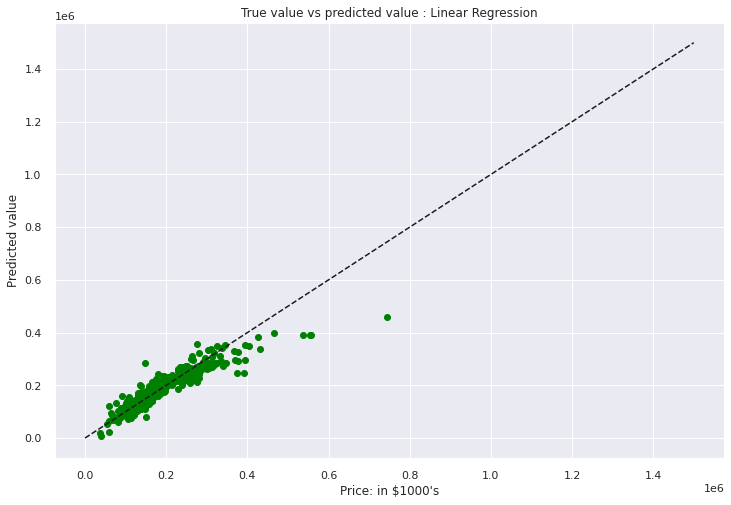

In [630]:
# Plotting Scatter graph to show the prediction
# results - 'ytrue' value vs 'y_pred' value
x = np.linspace(0, 1500000, 150000)
plt.plot(x, x, color='k',linestyle="--")
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

**Lasso**

In [631]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred1 = lasso.predict(X_test)
predictions = lasso.predict(X_test)

In [632]:
mmae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)
new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)
accuracy_train = lasso.score(X_train,y_train)
accuracy_test = lasso.score(X_test, y_test)
print('Accuracy train: ',accuracy_train)
print('Accuracy test: ',accuracy_test)

MAE: 20744.485263945484
MSE: 1077933923.054736
RMSE: 32831.904042481845
R2 Score: 0.8389307560973199
------------------------------
RMSE Cross-Validation: 35922.76936876075
Accuracy train:  0.794112442830406
Accuracy test:  0.8389307560973199


In [633]:
steps = [('poly feature', PolynomialFeatures(degree=2)),
         ('regressor', Lasso(alpha=0.1))]
LR = Pipeline(steps=steps)
LR.fit(X_train, y_train)

Pipeline(steps=[('poly feature', PolynomialFeatures()),
                ('regressor', Lasso(alpha=0.1))])

In [634]:
Pipeline(steps=[('poly feature', PolynomialFeatures()),
                ('regressor', Lasso(alpha=0.1))])

Pipeline(steps=[('poly feature', PolynomialFeatures()),
                ('regressor', Lasso(alpha=0.1))])

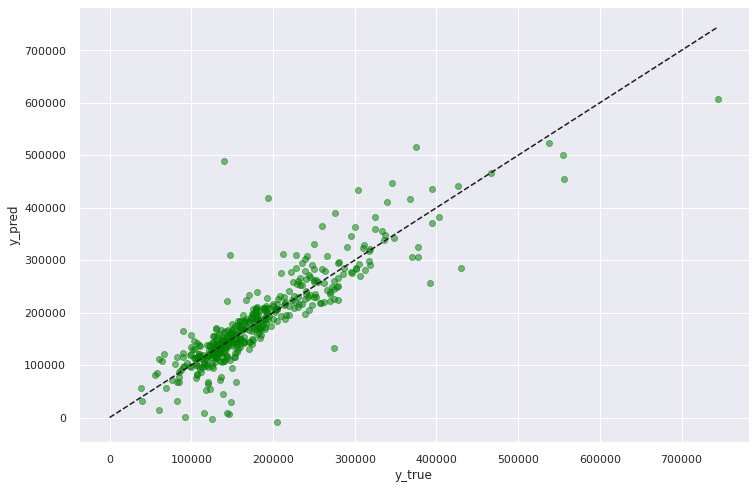

In [635]:
y_pred = LR.predict(X_test)

x = np.linspace(0, max(np.max(y_test), np.max(y_pred)), 15000)
plt.plot(x, x,color='k',linestyle="--")
plt.scatter(y_test, y_pred, alpha=0.5,c="green");
plt.xlabel('y_true');
plt.ylabel('y_pred');

In [636]:
"""putting together the coefficient and their corresponding variable names"""
lasso_coef = pd.DataFrame()
lasso_coef['Columns'] = X_train.columns
lasso_coef['Coefficient Estimate'] = pd.Series(lasso.coef_)
print(lasso_coef)

                  Columns  Coefficient Estimate
0             OverallQual          23252.329389
1               YearBuilt           6744.768456
2            YearRemodAdd           3688.053720
3             TotalBsmtSF           3728.657863
4                1stFlrSF           3895.884180
5               GrLivArea          24008.759770
6                FullBath          -1980.420889
7            TotRmsAbvGrd           -419.391569
8              GarageCars          11439.181965
9              GarageArea           -500.190791
10       MSZoning_C (all)         -20031.041077
11            MSZoning_FV              0.000000
12            MSZoning_RH          10936.154085
13            MSZoning_RL           3607.923419
14            MSZoning_RM          -6485.010140
15       Utilities_AllPub              0.000000
16       Utilities_NoSeWa              0.000000
17          BldgType_1Fam          11999.817226
18        BldgType_2fmCon           6881.108585
19        BldgType_Duplex         -11617

Lasso Regression will try to add one feature at a time, and if the new feature dosen't improves the fit enough to overweigh penalty term including that feature, then it won't be added.

**Ridge**

In [637]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)
new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 20736.236469860123
MSE: 1080371413.5336244
RMSE: 32869.00384151647
R2 Score: 0.8385665364173771
------------------------------
RMSE Cross-Validation: 35887.85279159834


In [638]:
# Calculating the Mean Squared Error
accuracy_train = ridge.score(X_train,y_train)
accuracy_test = ridge.score(X_test, y_test)
print('Accuracy train: ',accuracy_train)
print('Accuracy test: ',accuracy_test)

Accuracy train:  0.7939939904736457
Accuracy test:  0.8385665364173771


In [639]:
steps = [('poly feature', PolynomialFeatures(degree=3)),
         ('regressor', Ridge(alpha=0.1))]
LR = Pipeline(steps=steps)
LR.fit(X_train, y_train)

Pipeline(steps=[('poly feature', PolynomialFeatures(degree=3)),
                ('regressor', Ridge(alpha=0.1))])

In [640]:
Pipeline(steps=[('poly feature', PolynomialFeatures(degree=3)),
                ('regressor', Ridge(alpha=0.1))])

Pipeline(steps=[('poly feature', PolynomialFeatures(degree=3)),
                ('regressor', Ridge(alpha=0.1))])

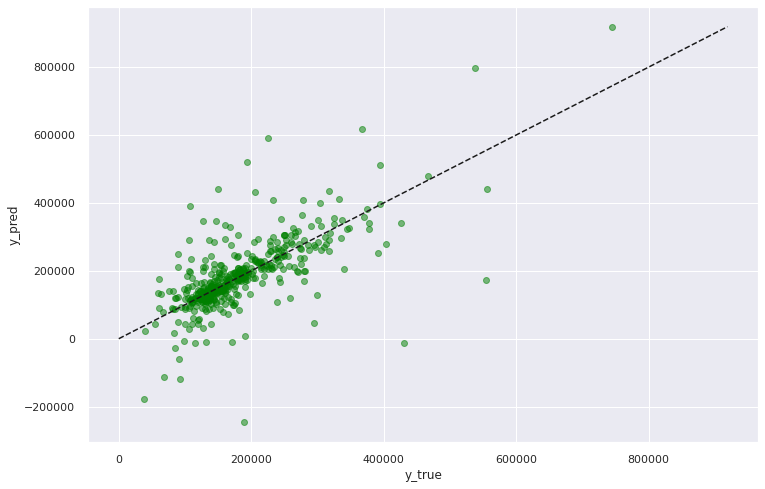

In [641]:
y_pred = LR.predict(X_test)

x = np.linspace(0, max(np.max(y_test), np.max(y_pred)), 15000)
plt.plot(x, x,color='k',linestyle="--")
plt.scatter(y_test, y_pred, alpha=0.5,c="green");
plt.xlabel('y_true');
plt.ylabel('y_pred');

In [642]:
"""putting together the coefficient and their corresponding variable names"""
ridge_coef = pd.DataFrame()
ridge_coef['Columns'] = X_train.columns
ridge_coef['Coefficient Estimate'] = pd.Series(ridge.coef_)
print(ridge_coef)

                  Columns  Coefficient Estimate
0             OverallQual          23273.688464
1               YearBuilt           6746.712088
2            YearRemodAdd           3778.177991
3             TotalBsmtSF           3672.295691
4                1stFlrSF           3985.692909
5               GrLivArea          23874.163803
6                FullBath          -1909.291513
7            TotRmsAbvGrd           -373.618779
8              GarageCars          11290.394100
9              GarageArea           -367.053069
10       MSZoning_C (all)         -16044.182237
11            MSZoning_FV           2238.715026
12            MSZoning_RH          12031.552185
13            MSZoning_RL           6035.655781
14            MSZoning_RM          -4261.740756
15       Utilities_AllPub              0.000000
16       Utilities_NoSeWa              0.000000
17          BldgType_1Fam          12036.300848
18        BldgType_2fmCon           6666.305290
19        BldgType_Duplex         -10988


the above graphs can be misleading in a way that it shows some of the coefficients become zero. In Ridge Regularization, the coefficients can never be 0, they are just too small to observe in above plots.


**Elastic Net Regularization:**
In elastic Net Regularization we added the both terms of L1 and L2 to get the final loss function.

In [643]:
elastic_net = ElasticNet()
elastic_net.fit(X_test, y_test)
predictions = elastic_net.predict(X_test)
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 21812.430279785945
MSE: 1233693311.9737306
RMSE: 35123.97061799435
R2 Score: 0.8156565586095654
------------------------------
RMSE Cross-Validation: 38449.00864609558


In [644]:
#Accuracy ELastic
accuracy_train = elastic_net.score(X_train,y_train)
accuracy_test = elastic_net.score(X_test, y_test)
print('Accuracy train: ',accuracy_train)
print('Accuracy test: ',accuracy_test)

Accuracy train:  0.7493808237113861
Accuracy test:  0.8156565586095654


In [645]:
steps = [('poly feature', PolynomialFeatures(degree=2)),
         ('regressor', Lasso(alpha=0.1))]
LR = Pipeline(steps=steps)
LR.fit(X_train, y_train)

Pipeline(steps=[('poly feature', PolynomialFeatures()),
                ('regressor', Lasso(alpha=0.1))])

In [646]:
steps = [('poly feature', PolynomialFeatures(degree=2)),
         ('regressor', ElasticNet(alpha=1, l1_ratio=0.01))]
LR = Pipeline(steps=steps)
LR.fit(X_train, y_train)

Pipeline(steps=[('poly feature', PolynomialFeatures()),
                ('regressor', ElasticNet(alpha=1, l1_ratio=0.01))])

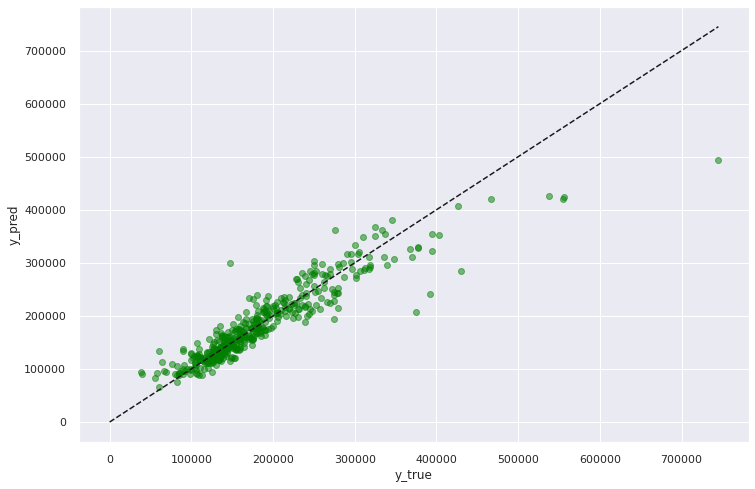

In [647]:
y_pred = LR.predict(X_test)
x = np.linspace(0, max(np.max(y_test), np.max(y_pred)), 15000)
plt.plot(x, x,color='k',linestyle="--")
plt.scatter(y_test, y_pred, alpha=0.5,color='green');
plt.xlabel('y_true');
plt.ylabel('y_pred');

In [648]:
"""putting together the coefficient and their corresponding variable names"""
enet_coef = pd.DataFrame()
enet_coef['Columns'] = X_train.columns
enet_coef['Coefficient Estimate'] = pd.Series(elastic_net.coef_)
print(enet_coef)

                  Columns  Coefficient Estimate
0             OverallQual          16032.797690
1               YearBuilt           7379.738553
2            YearRemodAdd           5598.018485
3             TotalBsmtSF          11749.128542
4                1stFlrSF           7935.924958
5               GrLivArea          15268.230147
6                FullBath           4369.425531
7            TotRmsAbvGrd           6546.170707
8              GarageCars           6102.158811
9              GarageArea           6335.291650
10       MSZoning_C (all)           -133.369001
11            MSZoning_FV             76.261991
12            MSZoning_RH           -568.077327
13            MSZoning_RL           2712.995485
14            MSZoning_RM          -2086.811401
15       Utilities_AllPub            125.901760
16       Utilities_NoSeWa           -125.901760
17          BldgType_1Fam           3296.858374
18        BldgType_2fmCon           -248.414558
19        BldgType_Duplex          -1425

In [649]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = (logreg.score(X_train, y_train))
acc_log

0.33463796477495106

In [650]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = (decision_tree.score(X_train, y_train))
acc_decision_tree

0.9921722113502935

In [651]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [652]:
DecisionTreeClassifier(max_depth=3)

DecisionTreeClassifier(max_depth=3)

In [653]:
from sklearn import tree
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_6 <= -0.12
|   |--- feature_5 <= -1.57
|   |   |--- feature_2 <= 0.71
|   |   |   |--- class: 35311
|   |   |--- feature_2 >  0.71
|   |   |   |--- class: 86000
|   |--- feature_5 >  -1.57
|   |   |--- feature_2 <= 1.05
|   |   |   |--- class: 140000
|   |   |--- feature_2 >  1.05
|   |   |   |--- class: 147000
|--- feature_6 >  -0.12
|   |--- feature_5 <= -0.06
|   |   |--- feature_1 <= -1.50
|   |   |   |--- class: 112000
|   |   |--- feature_1 >  -1.50
|   |   |   |--- class: 160000
|   |--- feature_5 >  -0.06
|   |   |--- feature_0 <= 0.29
|   |   |   |--- class: 200000
|   |   |--- feature_0 >  0.29
|   |   |   |--- class: 225000



In [654]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [655]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [656]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.03131115459882583


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [657]:
print (classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

       34900       0.00      0.00      0.00         1
       35311       0.11      1.00      0.20         1
       40000       0.00      0.00      0.00         1
       52000       0.00      0.00      0.00         1
       52500       0.00      0.00      0.00         1
       55000       0.00      0.00      0.00         1
       55993       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         1
       61000       0.00      0.00      0.00         1
       62383       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         2
       68500       0.00      0.00      0.00         1
       72500       0.00      0.00      0.00         1
       73000       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       75500       0.00      0.00      0.00         1
       76500       0.00      0.00      0.00         1
       78000       0.00    

In [658]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) )
acc_random_forest

1

In [659]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
2,Ridge,20736.236470,1.080371e+09,32869.003842,0.838567,35887.852792
1,Lasso,20744.485264,1.077934e+09,32831.904042,0.838931,35922.769369
0,LinearRegression,20744.485264,1.077924e+09,32831.759590,0.838932,35933.128976
3,ElasticNet,21812.430280,1.233693e+09,35123.970618,0.815657,38449.008646


In [660]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [661]:
accuracy_model=pd.DataFrame(columns=['Model','Accuracy'])

In [662]:
accuracy_list = {'SalePrice':{'Logistic Regression':0,'KNN':0,'Decision Tree':0},
                 'Diabetes':{'Logistic Regression':0,'Gaussian Naive Bayes':0,"Bernoulli Naive Bayes":0,'KNN':0,'Decision Tree':0},
                 'Hypertension':{'Logistic Regression':0,'Gaussian Naive Bayes':0,"Bernoulli Naive Bayes":0,'KNN':0,'Decision Tree':0}}

In [663]:
def model_train_test(name,model_name,model):
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    print(classification_report(y_test,y_pred))
    cm = metrics.confusion_matrix(y_test,y_pred)
    
    fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(8, 8),cmap='flare')
    plt.xlabel('Predictions')
    plt.ylabel('Actuals')
    plt.title('Confusion Matrix ')
    plt.show()
    report = round(metrics.accuracy_score(y_test,y_pred)*100)
    accuracy_list[name][model_name] = report
    print("Accuracy of the model: {:.2f} %".format(report))
    print("\n\n\n\n")
    print('ROC-AUC\n')
    visualizer = ROCAUC(model, classes=["No", "Yes"])

    visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)        # Evaluate the model on the test data
    visualizer.show() 

In [664]:
def plot_bar(name):
    keys = list(accuracy_list[name].keys())
    values = list(accuracy_list[name].values())
    fig = plt.figure(figsize =(10, 7))
    plt.bar(keys, values, color =['#132A13','#31572C','#4F772D','#90A955','#90A955'],width = 0.4)
    plt.show()

In [665]:
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, r2_score

In [666]:
steps1 = [('poly feature', PolynomialFeatures(degree=2)),
          ('regressor', LinearRegression())]

steps2 = [('poly feature', PolynomialFeatures(degree=3)),
          ('regressor', Ridge(alpha=0.1))]

steps3 = [('poly feature', PolynomialFeatures(degree=2)),
          ('regressor', Lasso(alpha=10))]

steps4 = [('poly feature', PolynomialFeatures(degree=2)),
          ('regressor', ElasticNet(alpha=1, l1_ratio=0.01))]
steps_list = [steps1, steps2, steps3, steps4]
for steps in steps_list:
    LR = Pipeline(steps=steps)
    LR.fit(X_train, y_train)
    y_pred = LR.predict(X_test)
    print('max_abs err: {}, mean_sq err: {}, mean_abs err: {}, R^2 err: {}'.format(max_error(y_test, y_pred),
                                                                                   mean_squared_error(y_test, y_pred),
                                                                                   mean_absolute_error(y_test, y_pred),
                                                                                   r2_score(y_test, y_pred)))

max_abs err: 3.433258915674902e+17, mean_sq err: 3.2166755864487395e+32, mean_abs err: 2276590175227375.5, R^2 err: -4.80648668260902e+22
max_abs err: 443104.8266314063, mean_sq err: 5823674874.775217, mean_abs err: 44443.407098655865, R^2 err: 0.12980296031796001
max_abs err: 199678.11962610454, mean_sq err: 1148088297.5440047, mean_abs err: 22524.65756285546, R^2 err: 0.8284480058899325
max_abs err: 250780.24989478372, mean_sq err: 969189952.1623164, mean_abs err: 19557.950871066612, R^2 err: 0.8551797197823858
